# Introduction

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Nicole Wittlin.000/Documents/Classes/MSDS7333 QTW/Case 7/final_project.csv')

In [3]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [5]:
df['x24']

0         euorpe
1           asia
2           asia
3           asia
4           asia
           ...  
159995      asia
159996      asia
159997      asia
159998      asia
159999      asia
Name: x24, Length: 160000, dtype: object

In [6]:
df.x24.value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [7]:
df['x29']

0         July
1          Aug
2         July
3         July
4         July
          ... 
159995     Aug
159996     May
159997     Jun
159998     May
159999     Aug
Name: x29, Length: 160000, dtype: object

In [8]:
df.x29.value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [9]:
df['x30']

0           tuesday
1         wednesday
2         wednesday
3         wednesday
4           tuesday
            ...    
159995    wednesday
159996    wednesday
159997    wednesday
159998    wednesday
159999      tuesday
Name: x30, Length: 160000, dtype: object

In [10]:
df.x30.value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [11]:
df['x32']

0           0.0%
1         -0.02%
2         -0.01%
3          0.01%
4          0.01%
           ...  
159995      0.0%
159996    -0.01%
159997     -0.0%
159998    -0.02%
159999     0.02%
Name: x32, Length: 160000, dtype: object

In [12]:
df['x32'] = df['x32'].str.rstrip('%').astype('float') / 100.0

In [13]:
df['x32']

0         0.0000
1        -0.0002
2        -0.0001
3         0.0001
4         0.0001
           ...  
159995    0.0000
159996   -0.0001
159997   -0.0000
159998   -0.0002
159999    0.0002
Name: x32, Length: 160000, dtype: float64

In [14]:
df['x37']

0          $1313.96
1          $1962.78
2           $430.47
3         $-2366.29
4          $-620.66
            ...    
159995     $-891.96
159996     $1588.65
159997      $687.46
159998      $439.21
159999    $-1229.34
Name: x37, Length: 160000, dtype: object

In [15]:
df['x37'] = df['x37'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [16]:
df['x37']

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159995    -891.96
159996    1588.65
159997     687.46
159998     439.21
159999   -1229.34
Name: x37, Length: 160000, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

# Exploratory Data Analysis

In [18]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


## Missing Data

In [19]:
# Missing Data Summary
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [20]:
# Drop all rows containing NaN values from the data frame

drop_nan_df = df.dropna()
df.dropna(inplace=True)

In [21]:
drop_nan_df.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [22]:
drop_nan_df.info

<bound method DataFrame.info of               x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9  ...        x41       x42  \
0        6.7

## % of 1 in y

In [28]:
len(df[drop_nan_df.y==1])/len(df)*100.0

40.11945047729683

## Correlation Matrices

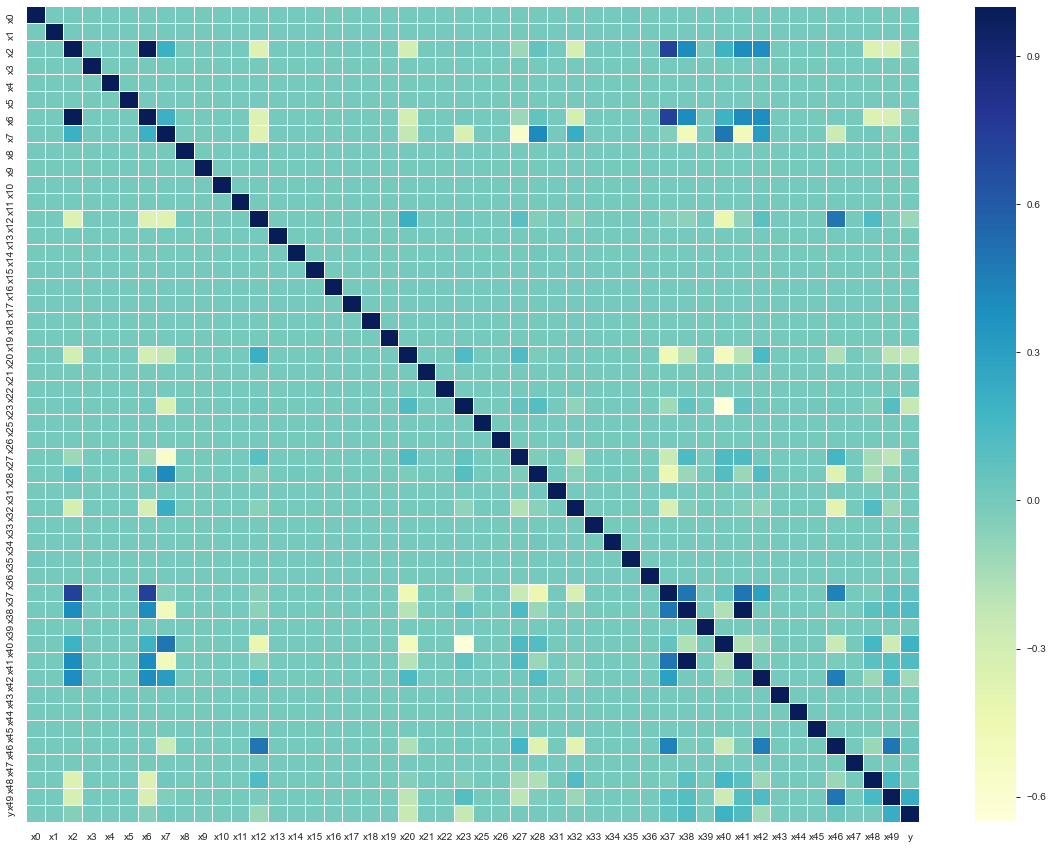

In [29]:
corrmat = drop_nan_df.corr() 
  
f, ax = plt.subplots(figsize =(20, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

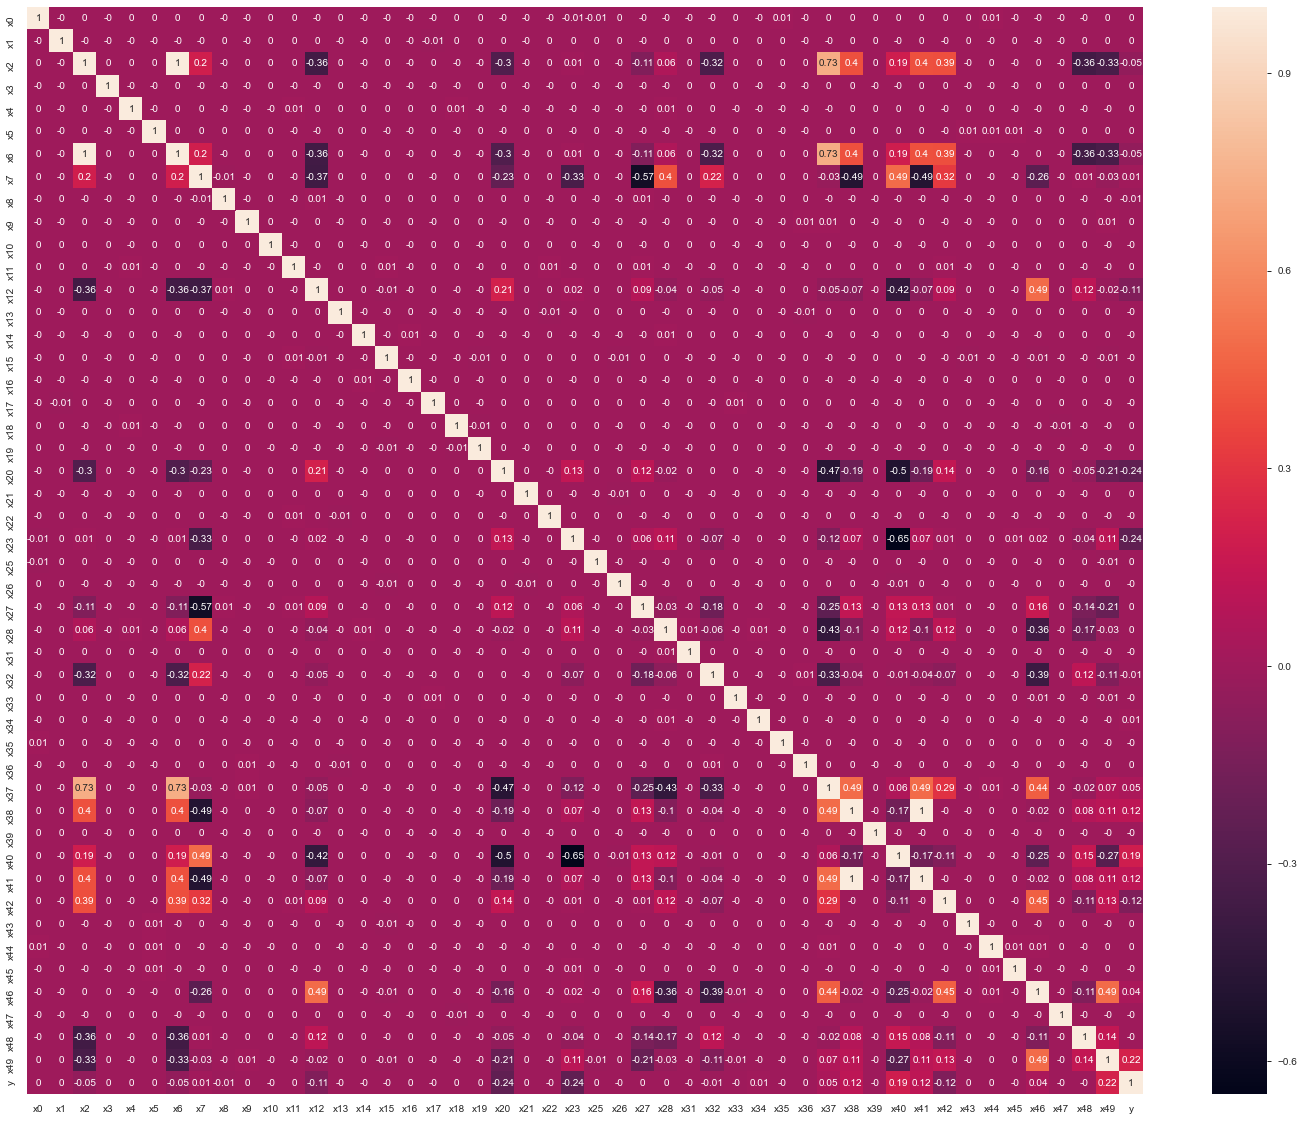

In [30]:
correlation_matrix = drop_nan_df.corr().round(2)
plt.figure(figsize = (25,20))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Pandas Profile (mini)

In [26]:
from pandas_profiling import ProfileReport

In [ ]:
#profFull = ProfileReport(df)
#profFull.to_file(output_file='output.html')

In [31]:
profileMin = ProfileReport(drop_nan_df, minimal=True)
profileMin.to_file(output_file="output_min.html")

In [ ]:
#prof1000 = ProfileReport(df.sample(n=1000)) 
#prof1000.to_file(output_file='output.html')
#vars = {'cat': {'check_composition' : False}}

In [33]:
# how to make pair plots....or is dataset too large

## One Hot Encode of Day, Month, Country

In [34]:
onehot1 = pd.get_dummies(drop_nan_df.x24, prefix='Country')
onehot1.head()

,Country_america,Country_asia,Country_euorpe
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [35]:
dataMergeoh1 = pd.concat([drop_nan_df, onehot1], axis=1)
dataMergeoh1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,Country_america,Country_asia,Country_euorpe
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,0,1
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,0,1,0


In [36]:
onehot2 = pd.get_dummies(dataMergeoh1.x29, prefix='Month')
onehot2.head()

,Month_Apr,Month_Aug,Month_Dev,Month_Feb,Month_January,Month_July,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_sept.
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:
dataMergeoh2 = pd.concat([dataMergeoh1, onehot2], axis=1)
dataMergeoh2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Dev,Month_Feb,Month_January,Month_July,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_sept.
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,1,0,0,0,0,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,1,0,0,0,0,0,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,1,0,0,0,0,0,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,1,0,0,0,0,0,0


In [38]:
onehot3 = pd.get_dummies(dataMergeoh2.x30, prefix='Day')
onehot3.head()

,Day_friday,Day_monday,Day_thurday,Day_tuesday,Day_wednesday
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0


In [39]:
clean_data = pd.concat([dataMergeoh2, onehot3], axis=1)
clean_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_sept.,Day_friday,Day_monday,Day_thurday,Day_tuesday,Day_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [40]:
clean_data = clean_data.drop(['x24', 'x29', 'x30'], axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   x0               158392 non-null  float64
 1   x1               158392 non-null  float64
 2   x2               158392 non-null  float64
 3   x3               158392 non-null  float64
 4   x4               158392 non-null  float64
 5   x5               158392 non-null  float64
 6   x6               158392 non-null  float64
 7   x7               158392 non-null  float64
 8   x8               158392 non-null  float64
 9   x9               158392 non-null  float64
 10  x10              158392 non-null  float64
 11  x11              158392 non-null  float64
 12  x12              158392 non-null  float64
 13  x13              158392 non-null  float64
 14  x14              158392 non-null  float64
 15  x15              158392 non-null  float64
 16  x16              158392 non-null  floa

In [41]:
clean_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_sept.,Day_friday,Day_monday,Day_thurday,Day_tuesday,Day_wednesday
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,0.007709,0.137052,0.002090,0.015058,0.067806,0.003510,0.003056,0.184125,0.174819,0.634489
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,0.087461,0.343904,0.045666,0.121782,0.251414,0.059144,0.055194,0.387588,0.379814,0.481575
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling Analysis

## Random Forest

In [42]:
print("The shape of our data is:", clean_data.shape)

The shape of our data is: (158392, 68)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
X = clean_data.drop('y', axis=1)
y = clean_data['y']

In [45]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=83)

In [46]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[18153   801]
 [ 1648 11077]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18954
           1       0.93      0.87      0.90     12725

    accuracy                           0.92     31679
   macro avg       0.92      0.91      0.92     31679
weighted avg       0.92      0.92      0.92     31679





In [52]:
rfc_cv_score = cross_val_score(rfc, X, y, cv = 3, scoring='roc_auc')

In [53]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[0.97238385 0.97346224 0.97241011]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9727520656937504


## Feature Importance

In [54]:
# get importance
importance = rfc.feature_importances_

# summarize feature importance
for p,q in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (p,q))

Feature: 0, Score: 0.00787
Feature: 1, Score: 0.00782
Feature: 2, Score: 0.02787
Feature: 3, Score: 0.00783
Feature: 4, Score: 0.00777
Feature: 5, Score: 0.00780
Feature: 6, Score: 0.02946
Feature: 7, Score: 0.03858
Feature: 8, Score: 0.00798
Feature: 9, Score: 0.00786
Feature: 10, Score: 0.00774
Feature: 11, Score: 0.00763
Feature: 12, Score: 0.04834
Feature: 13, Score: 0.00783
Feature: 14, Score: 0.00784
Feature: 15, Score: 0.00773
Feature: 16, Score: 0.00777
Feature: 17, Score: 0.00766
Feature: 18, Score: 0.00781
Feature: 19, Score: 0.00788
Feature: 20, Score: 0.05905
Feature: 21, Score: 0.00764
Feature: 22, Score: 0.00779
Feature: 23, Score: 0.07191
Feature: 24, Score: 0.00765
Feature: 25, Score: 0.00785
Feature: 26, Score: 0.04636
Feature: 27, Score: 0.04737
Feature: 28, Score: 0.00766
Feature: 29, Score: 0.02612
Feature: 30, Score: 0.00779
Feature: 31, Score: 0.00780
Feature: 32, Score: 0.00798
Feature: 33, Score: 0.00775
Feature: 34, Score: 0.04233
Feature: 35, Score: 0.03651
Fe

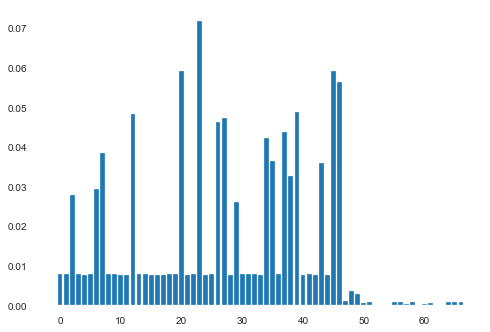

In [55]:
# plot feature importance
plt.bar([p for p in range(len(importance))], importance)
plt.show()

# Conclusion 